# Remove Blurred Face Annotations & NULL Images

This notebook is to be run after the crop-pad notebook on both the training and validation sets. Removes the blurred and null files from the dataset, to balance the faces and face_masks category.

In [1]:
%matplotlib inline

In [2]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm
import shutil

## Null file removal:

In [7]:
def remove_null_files(path):
    errors = []
    ims = os.listdir(path)

    for im in tqdm(ims):
        try:
            image = cv2.imread(str(path/im))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        except:
            errors.append(path/im)

    for file in errors:
        os.remove(file)
        pass
        
    print(f"{len(errors)} null files removed.")

In [8]:
train_path = Path("D:/Datasets/COVID-19-mask-detection/training/images/cropped")

In [9]:
remove_null_files(train_path/"face_mask")


12 null files removed.


In [10]:
remove_null_files(train_path/"face_FULL")


3 null files removed.


In [11]:
valid_path = Path("D:/Datasets/COVID-19-mask-detection/validation/images/cropped")

In [13]:
remove_null_files(valid_path/"face_FULL")


2 null files removed.


In [14]:
remove_null_files(valid_path/"face_mask")


8 null files removed.


## Blurred file pruning

We calculate the laplacian and sort by most blurred.

In [15]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [16]:
# thresh = 100

In [17]:
train_im_dir = Path("D:/Datasets/COVID-19-mask-detection/training/images/cropped")
val_im_dir = Path("D:/Datasets/COVID-19-mask-detection/validation/images/cropped")

In [19]:
def get_focus_measures(path):
    focus_measures = []
    errors = 0
    ims = os.listdir(path)

    for im in tqdm(ims):
        try:
            image = cv2.imread(str(path/im))
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            focus_measures.append((im, variance_of_laplacian(gray)))
        except:
            errors += 1

    focus_measures.sort(key = lambda x: x[1])
    print(f"{errors} errors occured.")
    
    return focus_measures

### For training set

In [20]:
focus_measures = get_focus_measures(train_im_dir/"face_FULL")


0 errors occured.


In [22]:
len(os.listdir(train_im_dir/"face_FULL")), len(os.listdir(train_im_dir/"face_mask"))

(7300, 2222)

In [23]:
2222 * 1.5

3333.0

In [24]:
# we want 3333 train images

In [25]:
index = 7300 - 3333 # we don't want index images

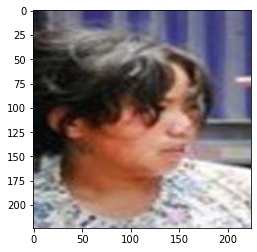

In [28]:
image = cv2.imread(str(train_im_dir/"face_FULL"/focus_measures[index][0]))
fm = focus_measures[index][1]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [31]:
ims2keep = focus_measures[index:]

In [ ]:
src_dir = train_im_dir/"face_FULL"
dest_dir = train_im_dir/"face"

if not os.path.exists(dest_dir): os.makedirs(dest_dir)

for im in tqdm(ims2keep):
    shutil.copyfile(src_dir/im[0], dest_dir/im[0])

### For validation set

In [36]:
focus_measures = get_focus_measures(val_im_dir/"face_FULL")


0 errors occured.


In [50]:
index = 400

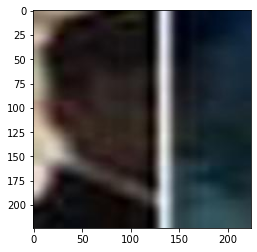

In [51]:
image = cv2.imread(str(val_im_dir/"face_FULL"/focus_measures[index][0]))
fm = focus_measures[index][1]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [64]:
index = 410

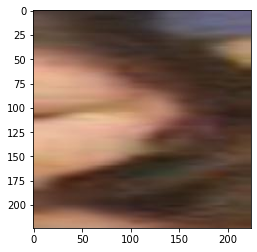

In [65]:
image = cv2.imread(str(val_im_dir/"face_FULL"/focus_measures[index][0]))
fm = focus_measures[index][1]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [66]:
index = 420

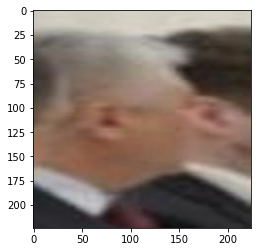

In [67]:
image = cv2.imread(str(val_im_dir/"face_FULL"/focus_measures[index][0]))
fm = focus_measures[index][1]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [68]:
ims2keep = focus_measures[index:]

In [71]:
src_dir = val_im_dir/"face_FULL"
dest_dir = val_im_dir/"face"

if not os.path.exists(dest_dir): os.makedirs(dest_dir)

for im in tqdm(ims2keep):
    shutil.copyfile(src_dir/im[0], dest_dir/im[0])